# Visualizations with R and ggplot2

## 1. Ranking
* compare position/performance of items with respect to each other
* rank could be more valuable than values themselves

### Ordered Bar Chart
* bar chart, ordered on the Y axis
* group the mean cty mileage - by manufacturer

In [2]:
mpg <- read.csv("http://goo.gl/uEeRGu")

cty_mpg <- aggregate(mpg$cty, by=list(mpg$manufacturer), FUN=mean)

colnames(cty_mpg) <- c("make", "mileage")
cty_mpg <- cty_mpg[order(cty_mpg$mileage), ]
cty_mpg$make <- factor(cty_mpg$make, levels = cty_mpg$make)

head(cty_mpg, 4)

,make,mileage
9,lincoln,11.33333
8,land rover,11.50000
3,dodge,13.13514
10,mercury,13.25000


* X is now the factor

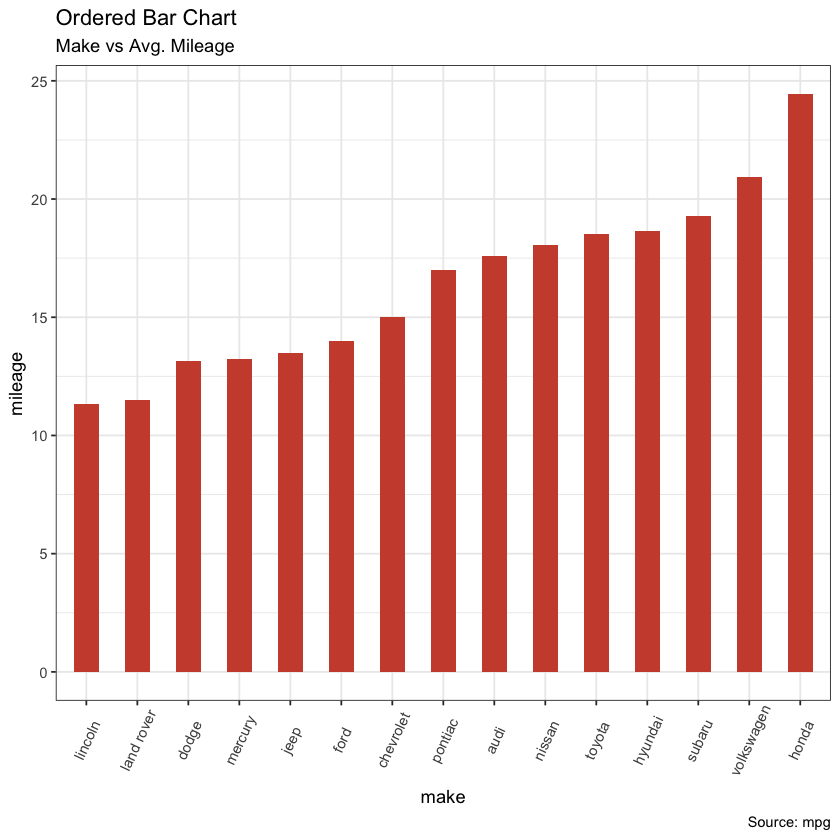

In [3]:
library(ggplot2)
theme_set(theme_bw())

ggplot(cty_mpg, aes(x=make, y=mileage)) +
    geom_bar(stat='identity', width=.5, fill="tomato3") +
    labs(title="Ordered Bar Chart",
        subtitle="Make vs Avg. Mileage",
        caption="Source: mpg") +
    theme(axis.text.x = element_text(angle=65, vjust=0.6))

### Lollipop Chart
* similar, reducing bars into thin lines

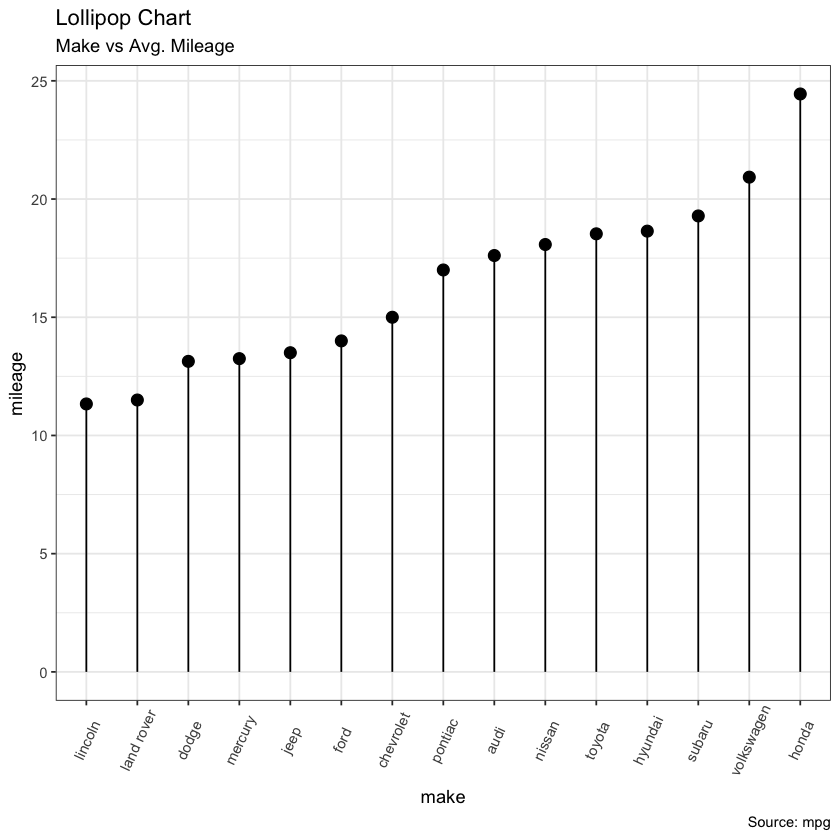

In [4]:
library(ggplot2)
theme_set(theme_bw())

ggplot(cty_mpg, aes(x=make, y=mileage)) +
    geom_point(size=3) +
    geom_segment(aes(x=make,
                    xend=make,
                    y=0,
                    yend=mileage)) +
    labs(title="Lollipop Chart",
        subtitle="Make vs Avg. Mileage",
        caption="Source: mpg") +
    theme(axis.text.x = element_text(angle=65, vjust=0.6))

### Dot Plot
* similar to above, without the line, and flipped horizontally
* places different emphasis on rank ordering - and how far entities are with respect to each other


The downloaded binary packages are in
	/var/folders/fn/10dyfg195751k6kfky4t_j7r0000gn/T//Rtmp1k5LxQ/downloaded_packages


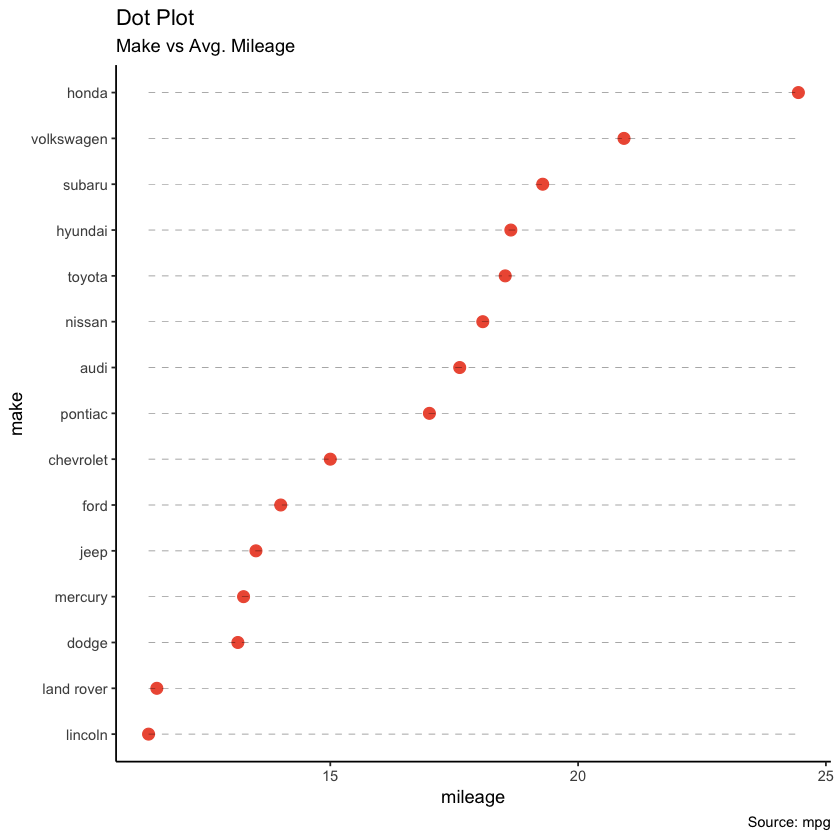

In [6]:
install.packages("scales")

library(ggplot2)
library(scales)
theme_set(theme_classic())

ggplot(cty_mpg, aes(x=make, y=mileage)) +
    geom_point(col="tomato2", size=3) +
    geom_segment(aes(x=make,
                    xend=make,
                    y=min(mileage),
                    yend=max(mileage)),
                linetype="dashed",
                size=0.1) +
    labs(title="Dot Plot",
         subtitle="Make vs Avg. Mileage",
         caption="Source: mpg") +
    coord_flip()

### Slope Chart
* for comparing positional placements between 2 points against time
* the code below serves as one approach - currently no builtin function for this

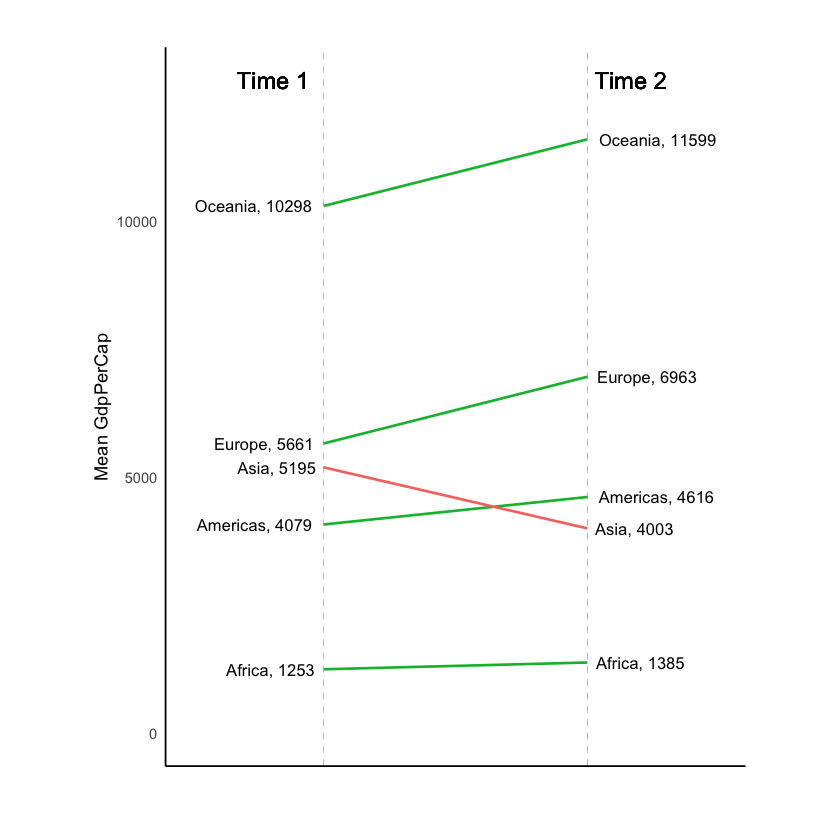

In [7]:
library(ggplot2)
library(scales)
theme_set(theme_classic())

df <- read.csv("https://raw.githubusercontent.com/selva86/datasets/master/gdppercap.csv")

colnames(df) <- c("continent", "1952", "1957")
left_label <- paste(df$continent, round(df$`1952`), sep=", ")
right_label <- paste(df$continent, round(df$`1957`), sep=", ")
df$class <- ifelse((df$`1957` - df$`1952`) < 0, "red", "green")

p <- ggplot(df) + 
    geom_segment(aes(x=1, xend=2, y=`1952`, yend=`1957`, col=class), size=.75, show.legend=F) +
    geom_vline(xintercept=1, linetype="dashed", size=.1) +
    geom_vline(xintercept=2, linetype="dashed", size=.1) +
    scale_color_manual(labels=c("Up", "Down"), values=c("green"="#00ba38", "red"="#f8766d")) +
    labs(x="", y="Mean GdpPerCap") +
    xlim(.5, 2.5) + 
    ylim(0,(1.1*(max(df$`1952`, df$`1957`))))

p <- p + geom_text(label=left_label, y=df$`1952`, x=rep(1, NROW(df)), hjust=1.1, size=3.5)

p <- p + geom_text(label=right_label, y=df$`1957`, x=rep(2, NROW(df)), hjust=-0.1, size=3.5)

p <- p + geom_text(label="Time 1", x=1, y=1.1*(max(df$`1952`, df$`1957`)), hjust=1.2, size=5)

p <- p + geom_text(label="Time 2", x=2, y=1.1*(max(df$`1952`, df$`1957`)), hjust=-0.1, size=5)

p + theme(panel.background = element_blank(),
         panel.grid = element_blank(),
         axis.ticks = element_blank(),
         axis.text.x = element_blank(),
         panel.border = element_blank(),
         plot.margin = unit(c(1,2,1,2), "cm"))

### Dumbell Plot
* useful for visualizing relative positions between 2 points of time - and for comparing distance between categories
* to get dumbell order - Y variable should be a factor

Warning message:
“Ignoring unknown parameters: point.colour.l”

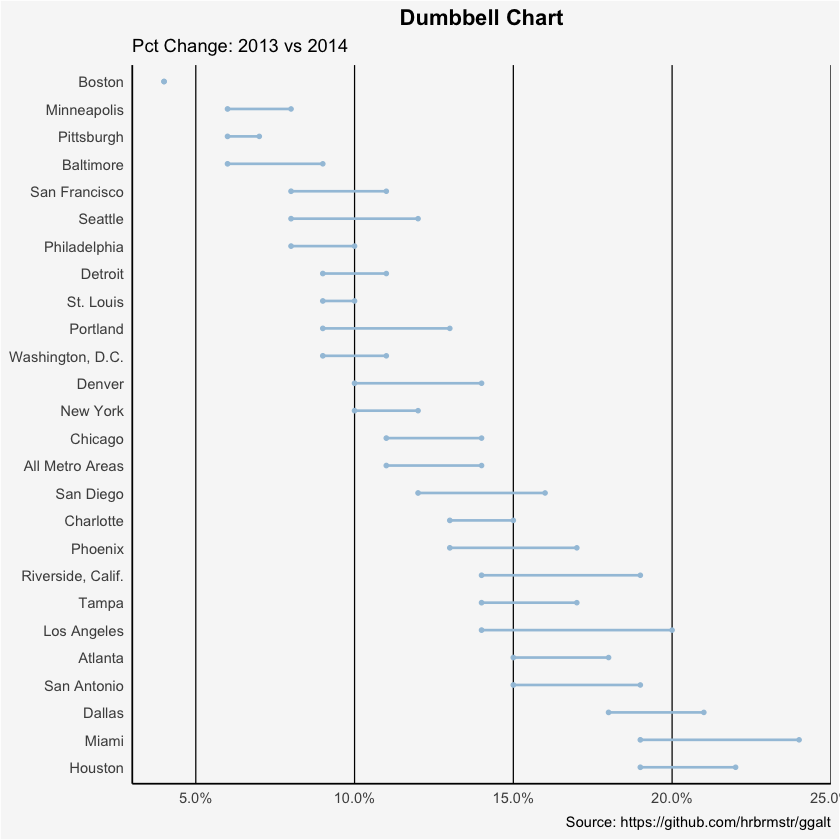

In [8]:
library(ggplot2)
library(ggalt)
theme_set(theme_classic())

health <- read.csv("https://raw.githubusercontent.com/selva86/datasets/master/health.csv")

# for right ordering of the dumbells
health$Area <- factor(health$Area, levels=as.character(health$Area))  


gg <- ggplot(health, aes(x=pct_2013, xend=pct_2014, y=Area, group=Area)) + 
        geom_dumbbell(color="#a3c4dc", 
                      size=0.75, 
                      point.colour.l="#0e668b") + 
        scale_x_continuous(label=percent) + 
        labs(x=NULL, 
             y=NULL, 
             title="Dumbbell Chart", 
             subtitle="Pct Change: 2013 vs 2014", 
             caption="Source: https://github.com/hrbrmstr/ggalt") +
        theme(plot.title = element_text(hjust=0.5, face="bold"),
              plot.background=element_rect(fill="#f7f7f7"),
              panel.background=element_rect(fill="#f7f7f7"),
              panel.grid.minor=element_blank(),
              panel.grid.major.y=element_blank(),
              panel.grid.major.x=element_line(),
              axis.ticks=element_blank(),
              legend.position="top",
              panel.border=element_blank())
plot(gg)

## 2. Distribution
* useful for having many data points and viewing where/how they are distributed
### Histogram
* on continuous variables

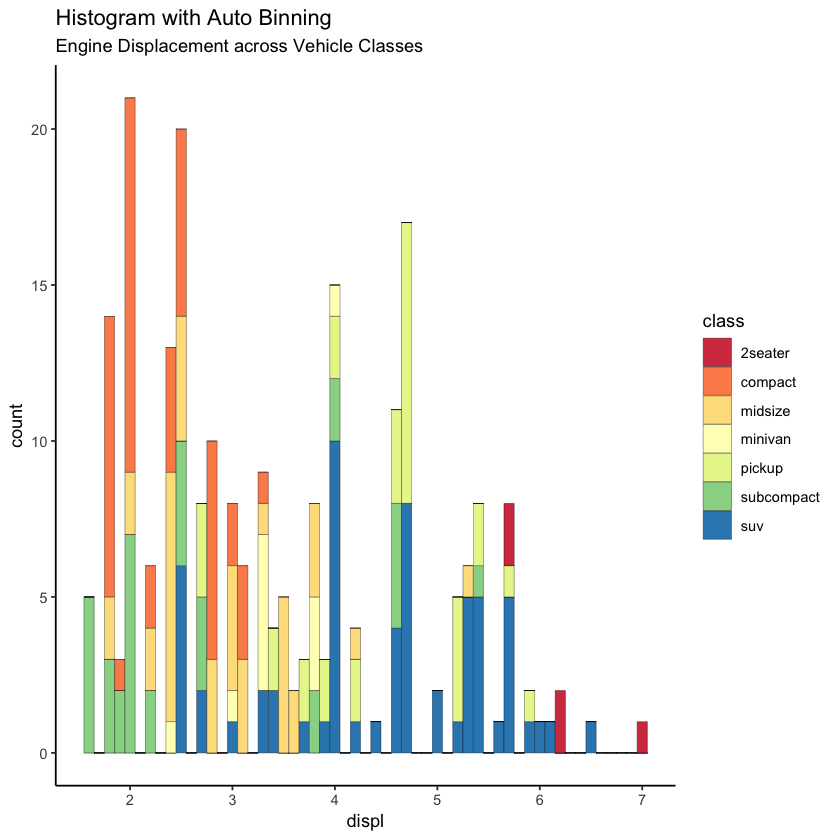

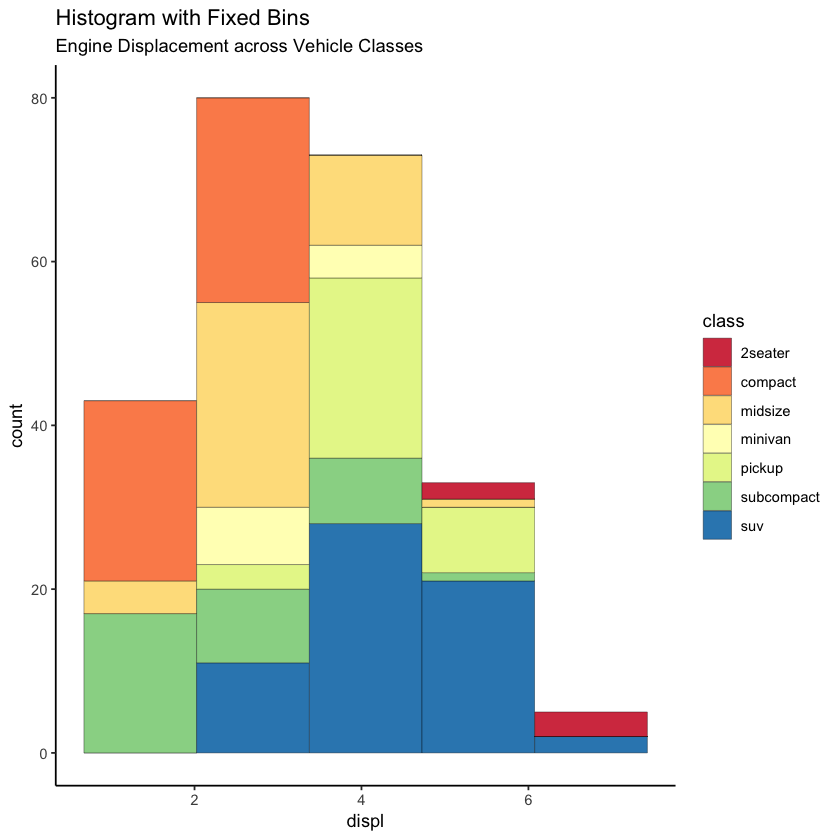

In [9]:
library(ggplot2)
theme_set(theme_classic())

g <- ggplot(mpg, aes(displ)) + scale_fill_brewer(palette="Spectral")

g + geom_histogram(aes(fill=class),
                  binwidth=.1,
                  col="black",
                  size=.1) +
    labs(title="Histogram with Auto Binning",
        subtitle="Engine Displacement across Vehicle Classes")

g + geom_histogram(aes(fill=class),
                  bins=5,
                  col="black",
                  size=.1) +
    labs(title="Histogram with Fixed Bins",
        subtitle="Engine Displacement across Vehicle Classes")

* on categorical variables

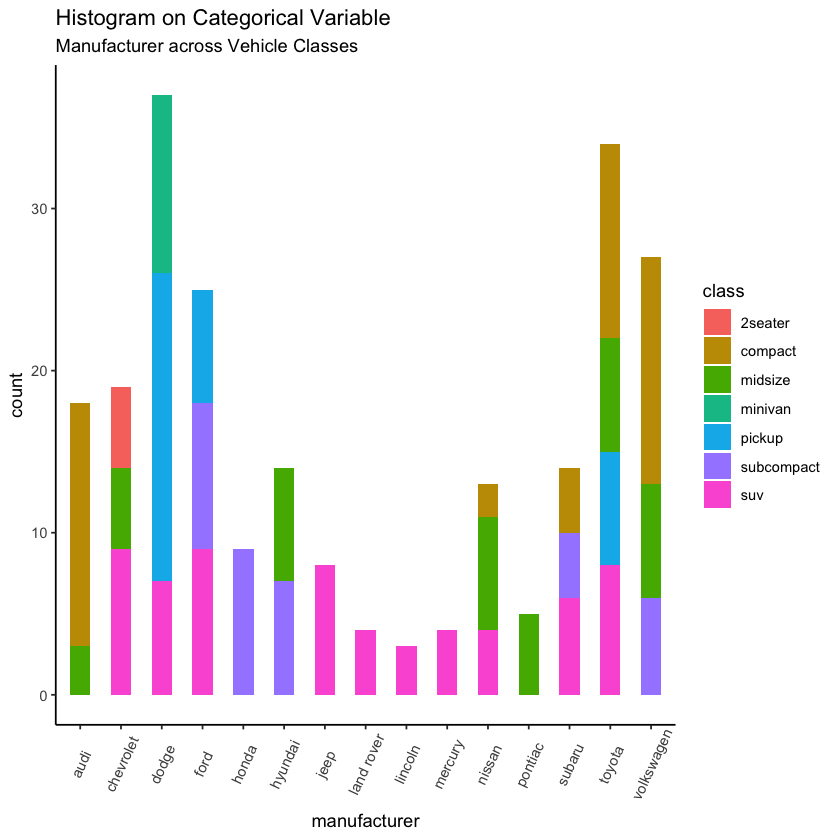

In [11]:
library(ggplot2)
theme_set(theme_classic())

g <- ggplot(mpg, aes(manufacturer))

g + geom_bar(aes(fill=class), width = 0.5) +
    theme(axis.text.x = element_text(angle=65, vjust=0.6)) +
    labs(title="Histogram on Categorical Variable",
        subtitle="Manufacturer across Vehicle Classes")

### Density Plot
* use geom_density( )

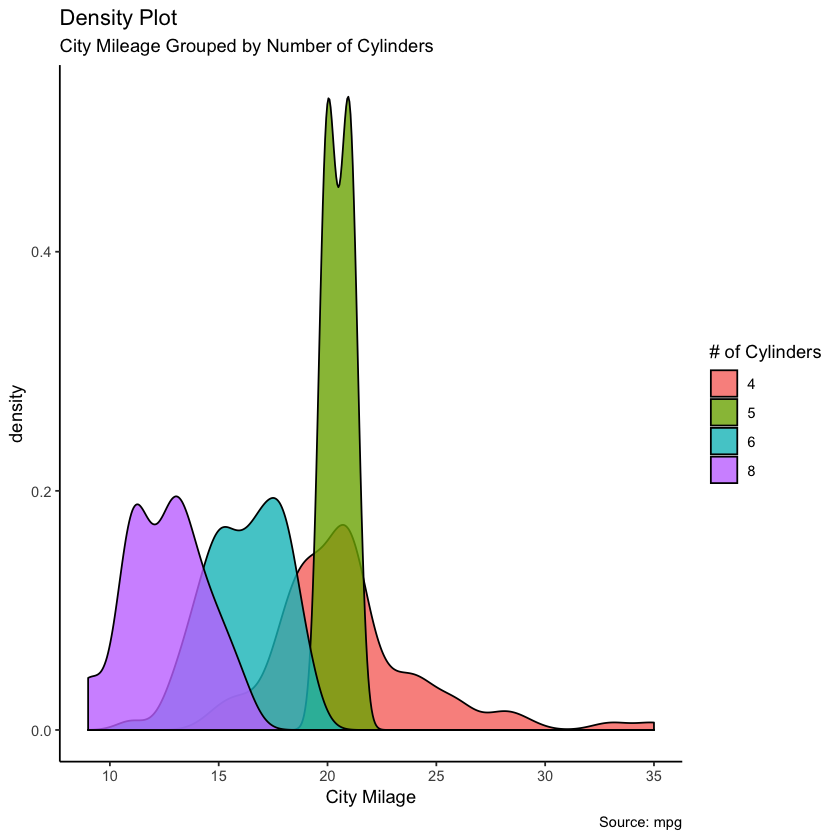

In [12]:
library(ggplot2)
theme_set(theme_classic())

g <- ggplot(mpg, aes(cty))

g + geom_density(aes(fill=factor(cyl)), alpha=0.8) +
    labs(title="Density Plot",
        subtitle="City Mileage Grouped by Number of Cylinders",
        caption="Source: mpg",
        x="City Milage",
        fill="# of Cylinders")

### Box Plot
* great for viewing distribution - along multiple groups, median, range, and outliers
* dark line in the box is the median
* top of the box is 75 percentile - bottom of the box is 25 percentile
* varwidth = T, adjusts box width to be proportional to the number of observations it represents

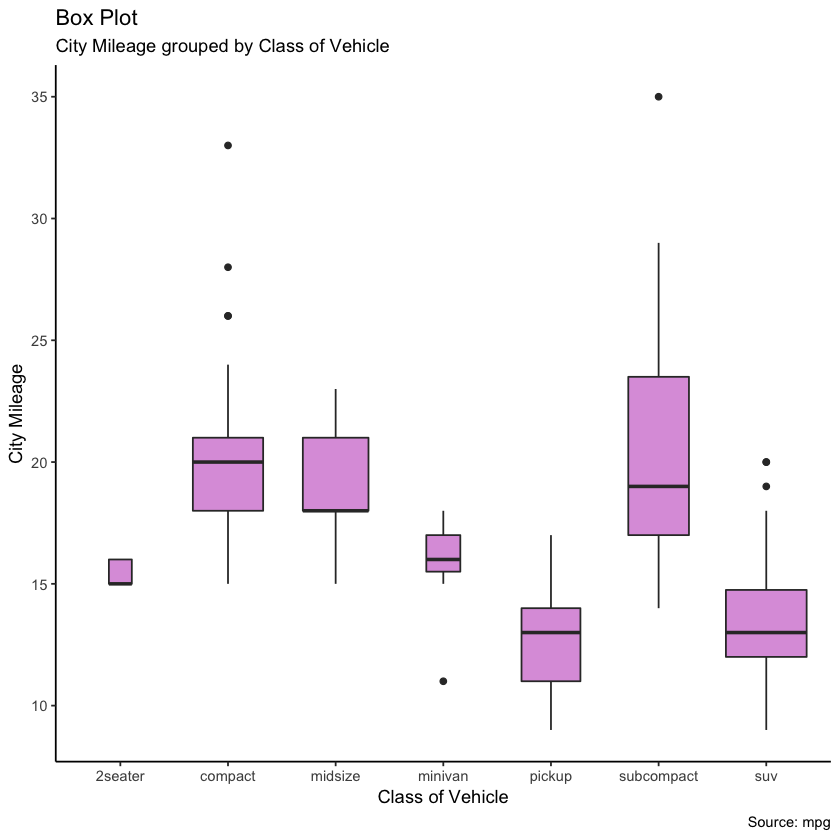

In [13]:
library(ggplot2)
theme_set(theme_classic())

g <- ggplot(mpg, aes(class, cty))

g + geom_boxplot(varwidth=T, fill="plum") +
    labs(title="Box Plot",
        subtitle="City Mileage grouped by Class of Vehicle",
        caption="Source: mpg",
        x="Class of Vehicle",
        y="City Mileage")

In [14]:
install.packages("ggthemes")


The downloaded binary packages are in
	/var/folders/fn/10dyfg195751k6kfky4t_j7r0000gn/T//Rtmp1k5LxQ/downloaded_packages


Warning message:
“package ‘ggthemes’ was built under R version 3.5.2”

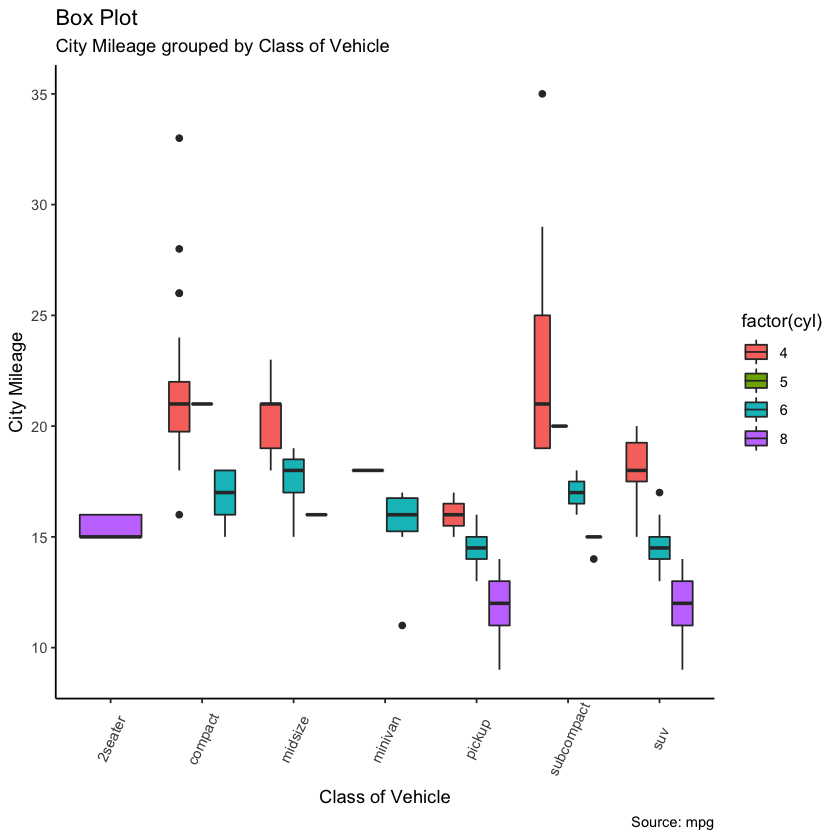

In [15]:
library(ggthemes)

g <- ggplot(mpg, aes(class, cty))

g + geom_boxplot(aes(fill=factor(cyl))) +
    theme(axis.text.x = element_text(angle=65, vjust=0.6)) + 
    labs(title="Box Plot",
        subtitle="City Mileage grouped by Class of Vehicle",
        caption="Source: mpg",
        x="Class of Vehicle",
        y="City Mileage")

### Dot + Box Plot
* box plot, plus dot plot - providing summary statistic information by each group
* dots are staggered - each dot represents 1 observation

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.


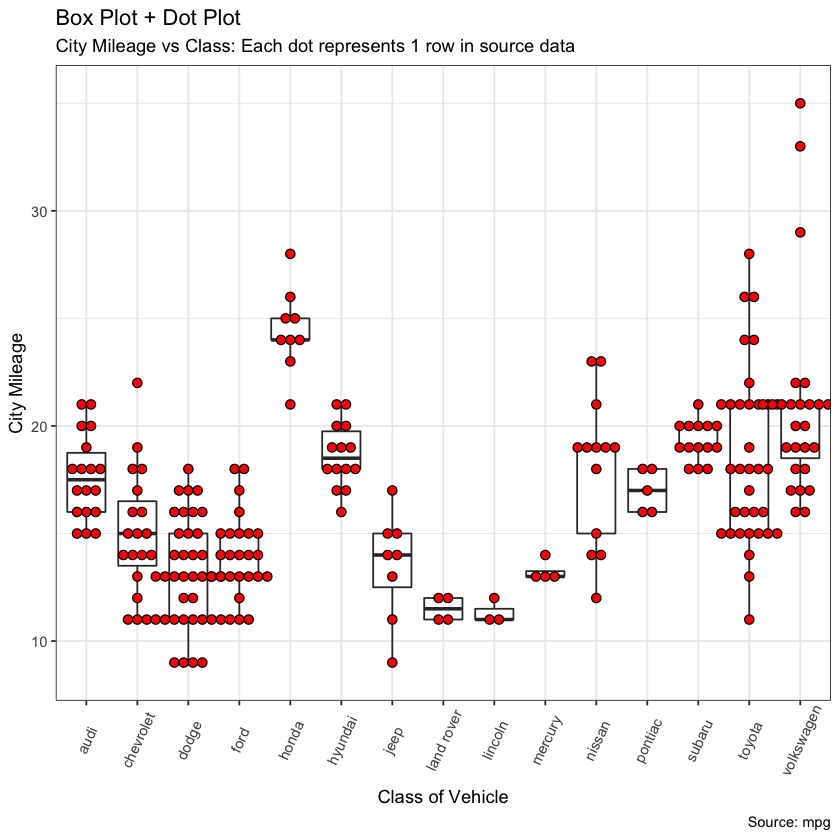

In [16]:
library(ggplot2)
theme_set(theme_bw())

g <- ggplot(mpg, aes(manufacturer, cty))

g + geom_boxplot() + 
    geom_dotplot(binaxis='y',
                stackdir='center',
                dotsize=.5,
                fill="red") +
    theme(axis.text.x = element_text(angle=65, vjust=0.6)) + 
    labs(title="Box Plot + Dot Plot",
        subtitle="City Mileage vs Class: Each dot represents 1 row in source data",
        caption="Source: mpg",
        x="Class of Vehicle",
        y="City Mileage")

### Tufte Box Plot
* minimal and visually slimming box plot

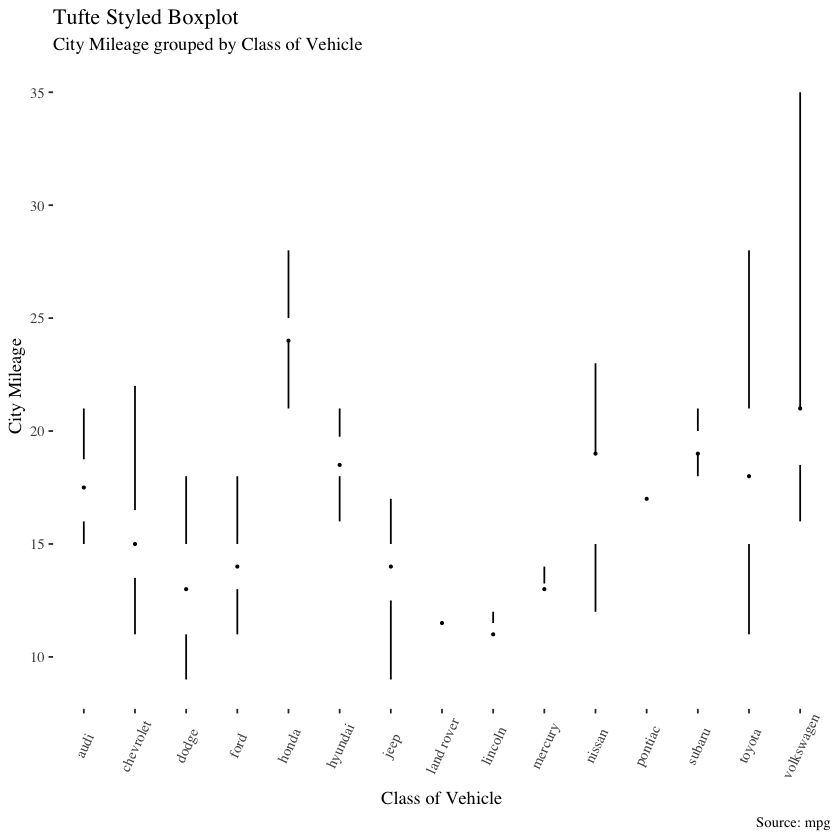

In [18]:
library(ggthemes)
library(ggplot2)
theme_set(theme_tufte())

g <- ggplot(mpg, aes(manufacturer, cty))

g + geom_tufteboxplot() + 
    theme(axis.text.x = element_text(angle=65, vjust=0.6)) +
    labs(title="Tufte Styled Boxplot",
        subtitle="City Mileage grouped by Class of Vehicle",
        caption="Source: mpg",
        x="Class of Vehicle",
        y="City Mileage")

### Violin Plot
* similar to box plot - shows the Density within groups
* use geom_violin( )

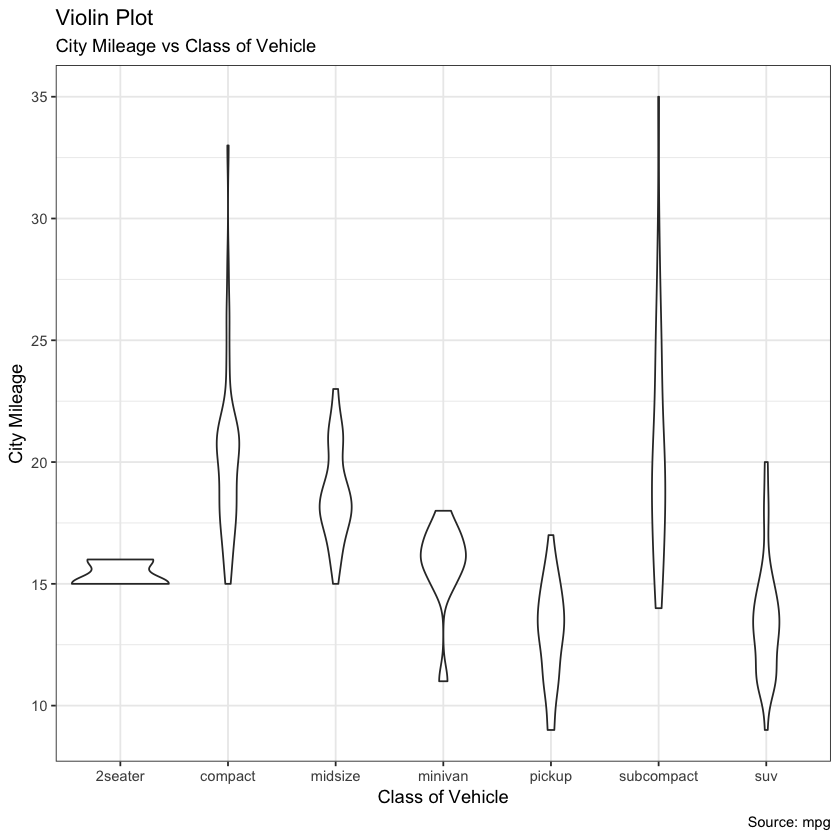

In [19]:
library(ggplot2)
theme_set(theme_bw())

g <- ggplot(mpg, aes(class, cty))

g + geom_violin() + 
    labs(title="Violin Plot",
        subtitle="City Mileage vs Class of Vehicle",
        caption="Source: mpg",
        x="Class of Vehicle",
        y="City Mileage")

### Population Pyramid
* how much a population (or population %) - falls under a certain category

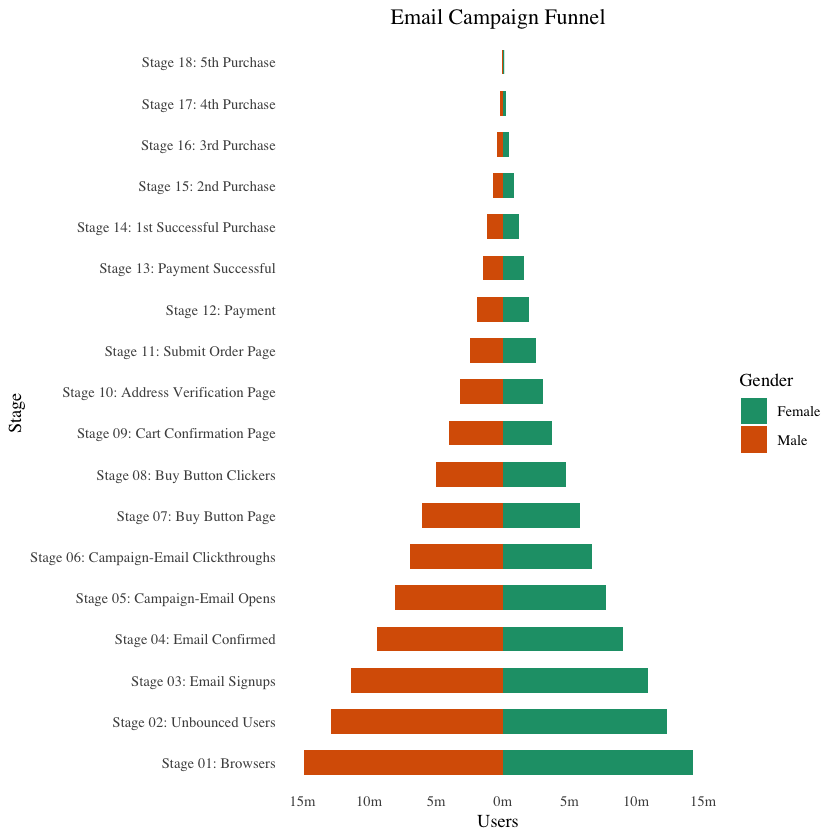

In [22]:
library(ggplot2)
library(ggthemes)
options(scipen=999)

email_campaign_funnel <- read.csv("https://raw.githubusercontent.com/selva86/datasets/master/email_campaign_funnel.csv")

brks <- seq(-15000000, 15000000, 5000000)
lbls = paste0(as.character(c(seq(15,0,-5), seq(5,15,5))), "m")

ggplot(email_campaign_funnel, aes(x=Stage, y=Users, fill=Gender)) + 
    geom_bar(stat="identity", width=.6) +
    scale_y_continuous(breaks=brks,
                      labels=lbls) +
    coord_flip() +
    labs(title="Email Campaign Funnel") +
    theme_tufte() +
    theme(plot.title=element_text(hjust=.5),
         axis.ticks=element_blank()) +
    scale_fill_brewer(palette="Dark2")